In [ ]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import StandardScaler, LabelEncoder
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import seaborn as sns

# dataset
file_path = r"C:\Users\kiara\KiaraADS502\breast-cancer.csv"
data = pd.read_csv(file_path)

# drop irrelevant columns
if 'id' in data.columns:
    data = data.drop(columns=['id'])

# check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
# turn categorical variables
if 'diagnosis' in data.columns:
    label_encoder = LabelEncoder()
    data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# normalize/Standardize numeric features
scaler = StandardScaler()
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Check for class imbalance
print("Class distribution:\n", data['diagnosis'].value_counts())

# results.
print("Cleaned dataset sample:")
print(data.head())


Class distribution:
 diagnosis
0    357
1    212
Name: count, dtype: int64
Cleaned dataset sample:
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1     1.097064     -2.073335        1.269934   0.984375   
1          1     1.829821     -0.353632        1.685955   1.908708   
2          1     1.579888      0.456187        1.566503   1.558884   
3          1    -0.768909      0.253732       -0.592687  -0.764464   
4          1     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   symmetry_mean 

In [5]:
print("Dataset shape after cleaning:", data.shape)


Dataset shape after cleaning: (569, 31)


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_numeric_dtype

print("Summary of Numeric Features:")
for col in data.columns:
    if is_numeric_dtype(data[col]):
        print(f'{col}:')
        print(f'\tMean = {data[col].mean():.2f}')
        print(f'\tStandard Deviation = {data[col].std():.2f}')
        print(f'\tMinimum = {data[col].min():.2f}')
        print(f'\tMaximum = {data[col].max():.2f}')
        print(f'\t25th Percentile = {data[col].quantile(0.25):.2f}')
        print(f'\t50th Percentile (Median) = {data[col].median():.2f}')
        print(f'\t75th Percentile = {data[col].quantile(0.75):.2f}')
        print()


Summary of Numeric Features:
radius_mean:
	Mean = 14.13
	Standard Deviation = 3.52
	Minimum = 6.98
	Maximum = 28.11
	25th Percentile = 11.70
	50th Percentile (Median) = 13.37
	75th Percentile = 15.78

texture_mean:
	Mean = 19.29
	Standard Deviation = 4.30
	Minimum = 9.71
	Maximum = 39.28
	25th Percentile = 16.17
	50th Percentile (Median) = 18.84
	75th Percentile = 21.80

perimeter_mean:
	Mean = 91.97
	Standard Deviation = 24.30
	Minimum = 43.79
	Maximum = 188.50
	25th Percentile = 75.17
	50th Percentile (Median) = 86.24
	75th Percentile = 104.10

area_mean:
	Mean = 654.89
	Standard Deviation = 351.91
	Minimum = 143.50
	Maximum = 2501.00
	25th Percentile = 420.30
	50th Percentile (Median) = 551.10
	75th Percentile = 782.70

smoothness_mean:
	Mean = 0.10
	Standard Deviation = 0.01
	Minimum = 0.05
	Maximum = 0.16
	25th Percentile = 0.09
	50th Percentile (Median) = 0.10
	75th Percentile = 0.11

compactness_mean:
	Mean = 0.10
	Standard Deviation = 0.05
	Minimum = 0.02
	Maximum = 0.35
	25th 

In [12]:
data.describe(include='all')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [13]:
print('Covariance:')
data.cov(numeric_only=True)

Covariance:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,12.418920,4.907582,85.447142,1224.483409,0.008454,0.094197,0.190128,0.112475,0.014273,-7.753706e-03,...,16.513749,6.433100,114.288570,1888.227223,0.009625,0.229249,0.387386,0.172393,0.035746,0.000450
texture_mean,4.907582,18.498909,34.439759,485.993787,-0.001415,0.053767,0.103692,0.048977,0.008419,-2.321158e-03,...,7.329267,24.110148,51.745933,841.283832,0.007611,0.188010,0.270110,0.083491,0.027942,0.009260
perimeter_mean,85.447142,34.439759,590.440480,8435.772345,0.070836,0.714714,1.387234,0.802360,0.121922,-4.485888e-02,...,113.858063,45.258113,792.328208,13026.148359,0.083526,1.742478,2.858506,1.231848,0.284300,0.022391
area_mean,1224.483409,485.993787,8435.772345,123843.554318,0.876178,9.264931,19.244924,11.241958,1.459596,-7.034264e-01,...,1637.521341,621.824934,11341.789807,192192.557633,0.992514,21.616602,37.634415,16.701789,3.125809,0.023756
smoothness_mean,0.008454,-0.001415,0.070836,0.876178,0.000198,0.000490,0.000585,0.000302,0.000215,5.806859e-05,...,0.014487,0.003118,0.112879,1.655299,0.000259,0.001045,0.001276,0.000465,0.000343,0.000127
compactness_mean,0.094197,0.053767,0.714714,9.264931,0.000490,0.002789,0.003718,0.001703,0.000873,2.108131e-04,...,0.136643,0.080544,1.047413,15.323436,0.000682,0.007194,0.008994,0.002831,0.001667,0.000656
concavity_mean,0.190128,0.103692,1.387234,19.244924,0.000585,0.003718,0.006355,0.002850,0.001094,1.895588e-04,...,0.265181,0.146934,1.954350,30.682405,0.000817,0.009469,0.014704,0.004513,0.002020,0.000741
concave points_mean,0.112475,0.048977,0.802360,11.241958,0.000302,0.001703,0.002850,0.001506,0.000492,4.572905e-05,...,0.155721,0.069819,1.116016,17.886881,0.000401,0.004075,0.006091,0.002321,0.000902,0.000258
symmetry_mean,0.014273,0.008419,0.121922,1.459596,0.000215,0.000873,0.001094,0.000492,0.000752,9.289106e-05,...,0.024609,0.015274,0.201896,2.765725,0.000267,0.002041,0.002481,0.000775,0.001187,0.000217
fractal_dimension_mean,-0.007754,-0.002321,-0.044859,-0.703426,0.000058,0.000211,0.000190,0.000046,0.000093,4.984872e-05,...,-0.008657,-0.002225,-0.048671,-0.932024,0.000081,0.000510,0.000510,0.000081,0.000146,0.000098


In [14]:
print('Correlation:')
data.corr(numeric_only=True)

Correlation:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Generating histograms for numeric features...


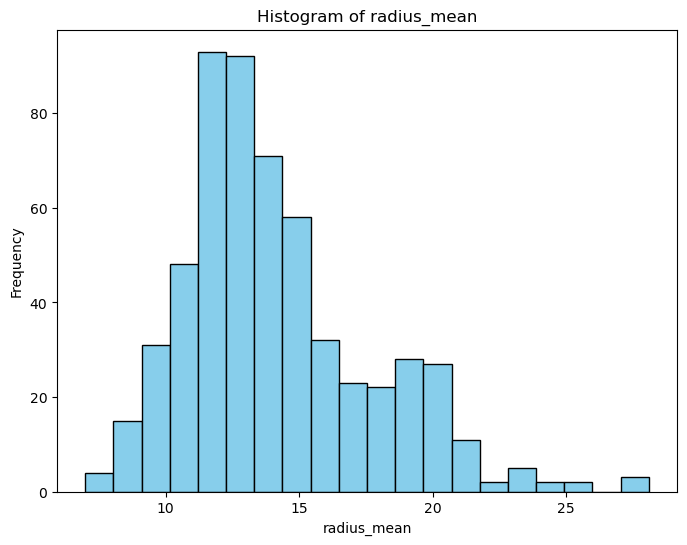

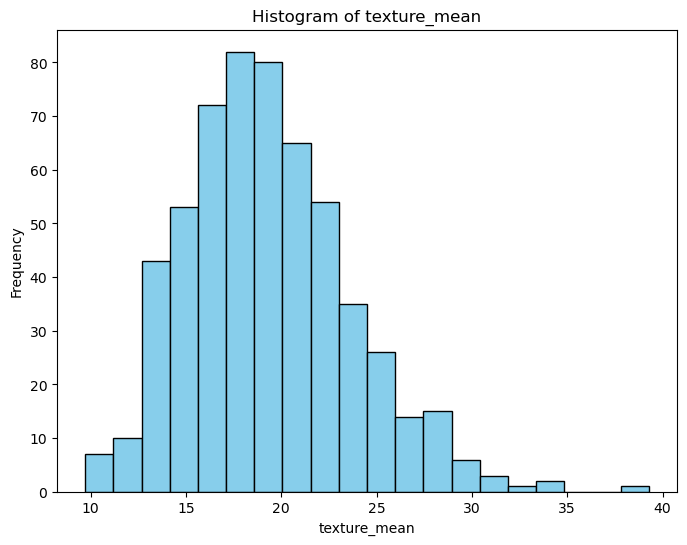

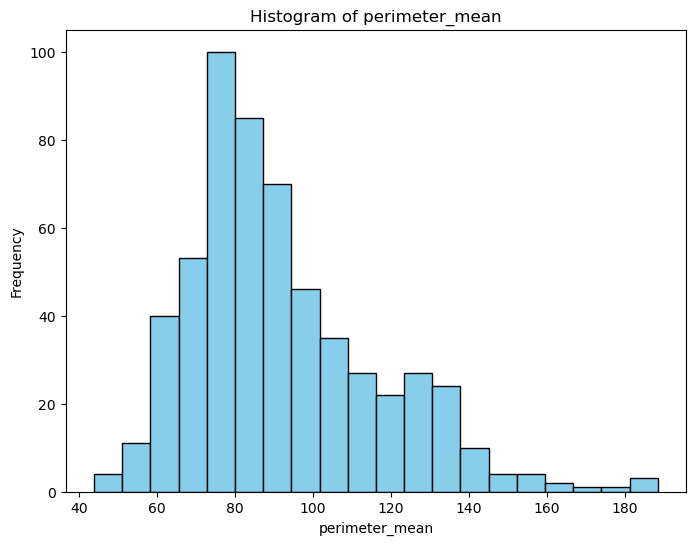

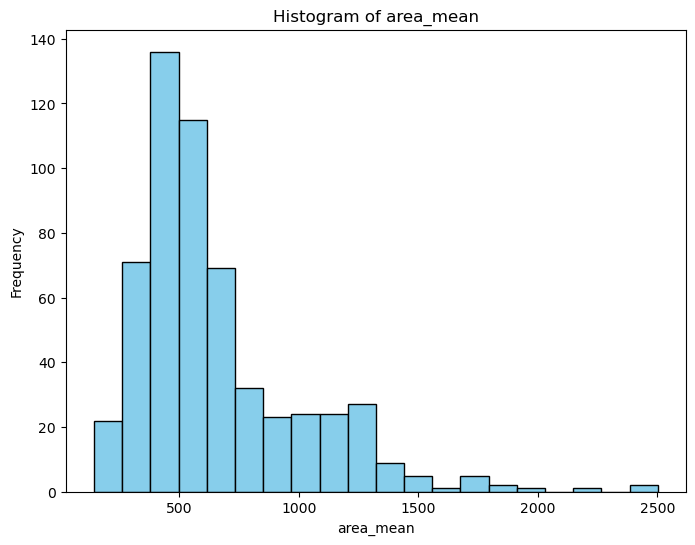

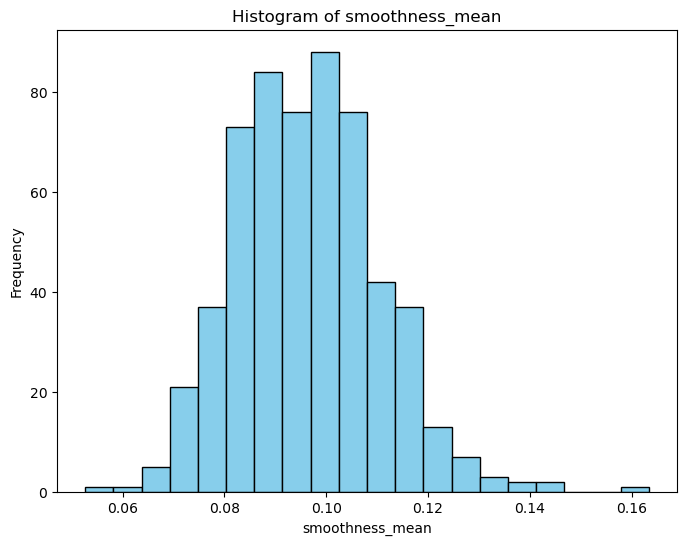

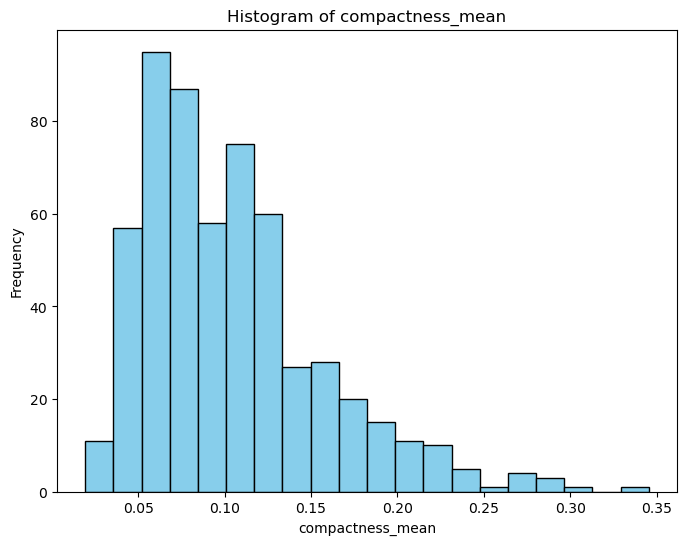

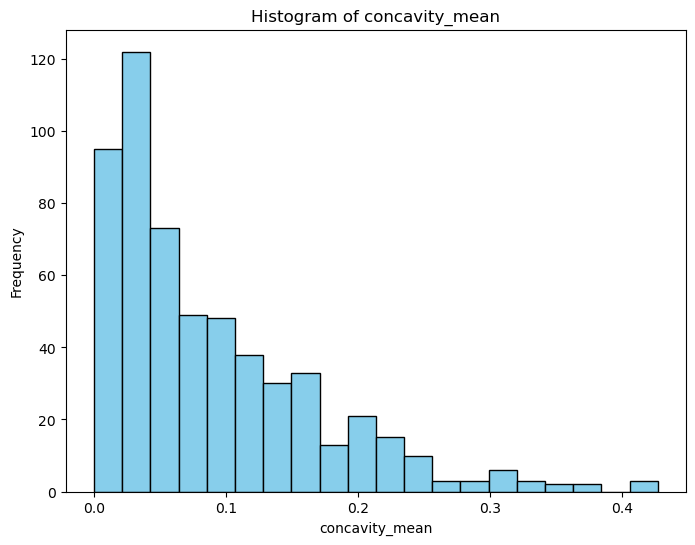

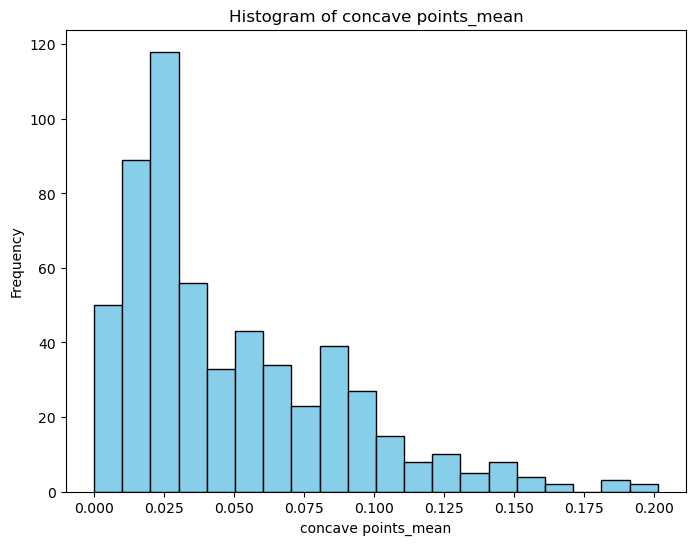

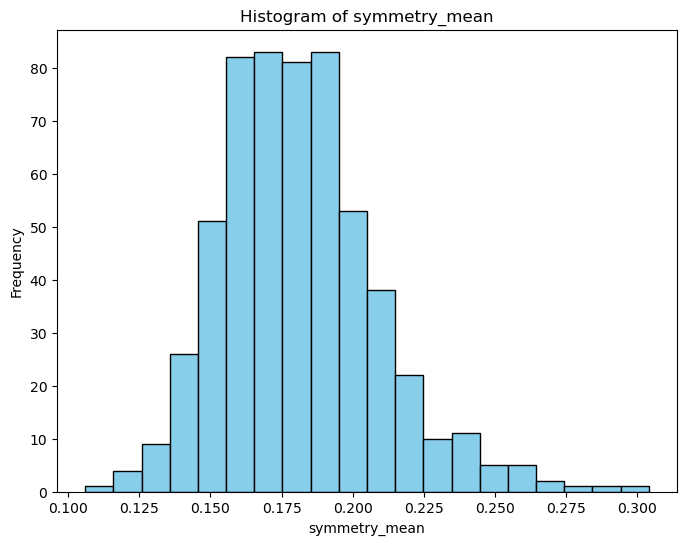

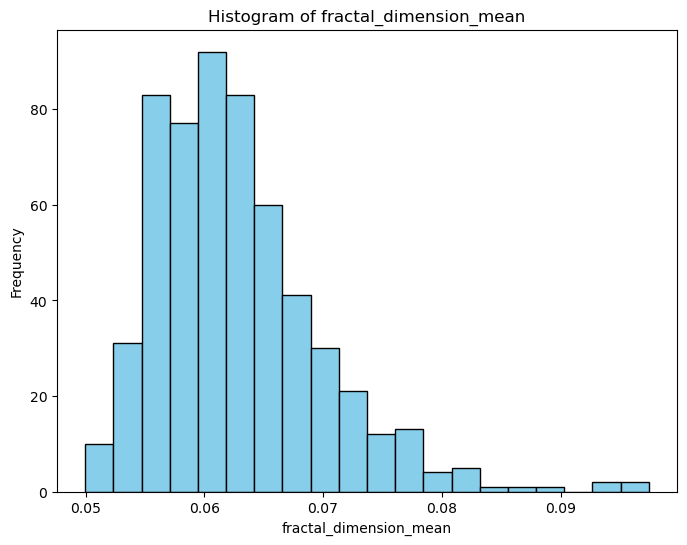

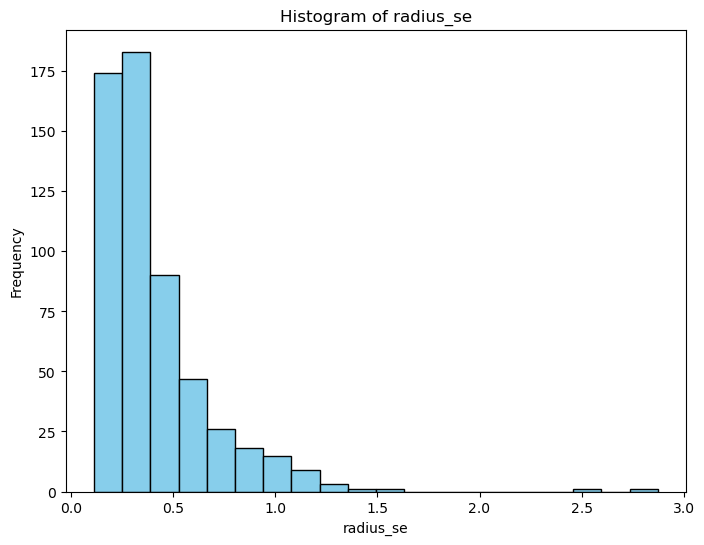

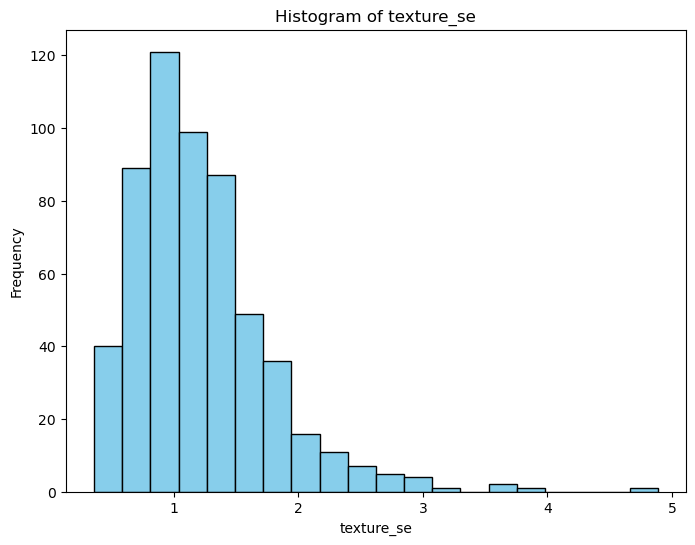

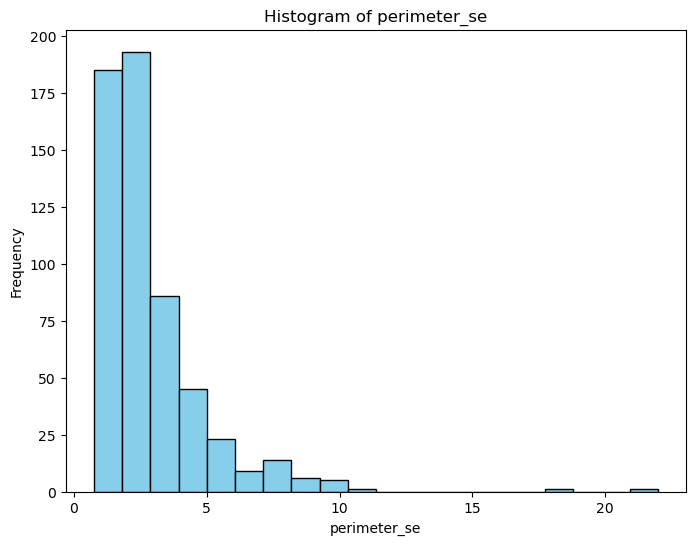

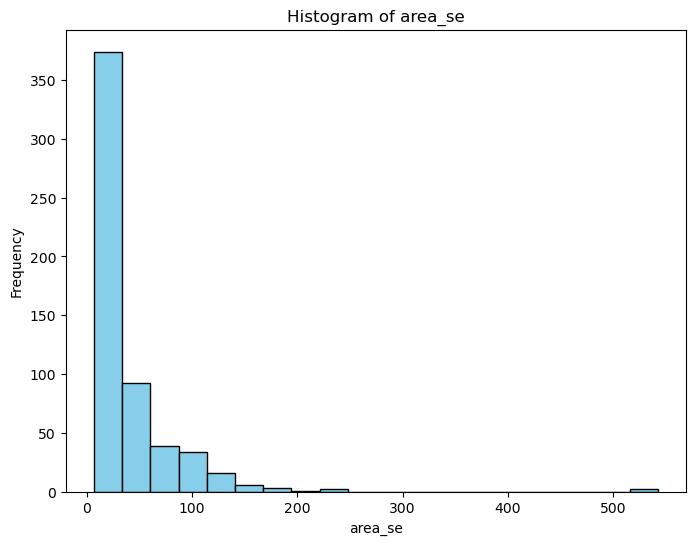

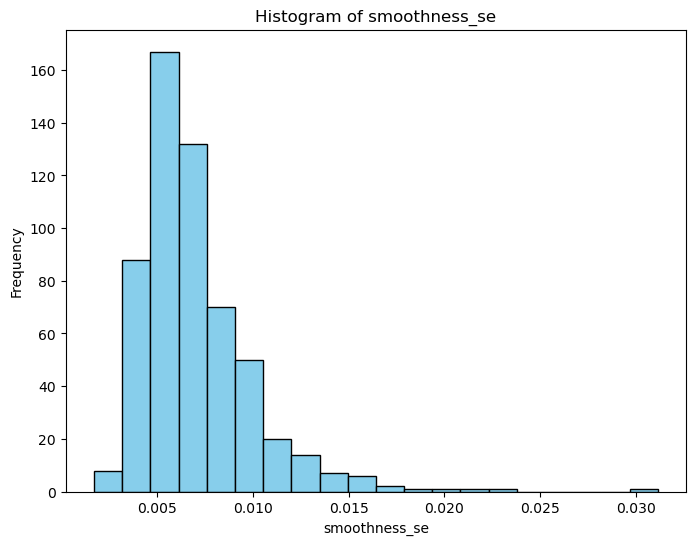

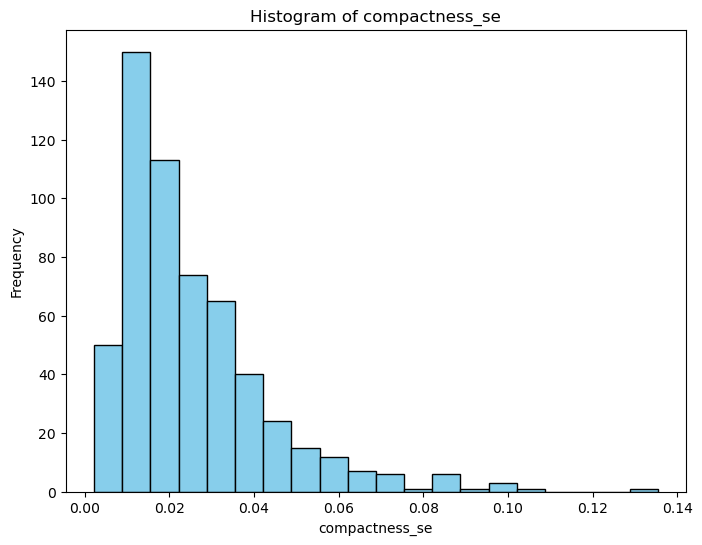

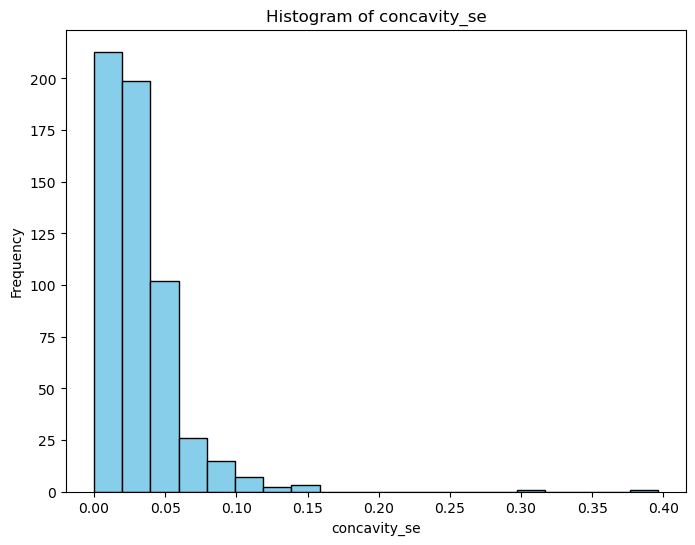

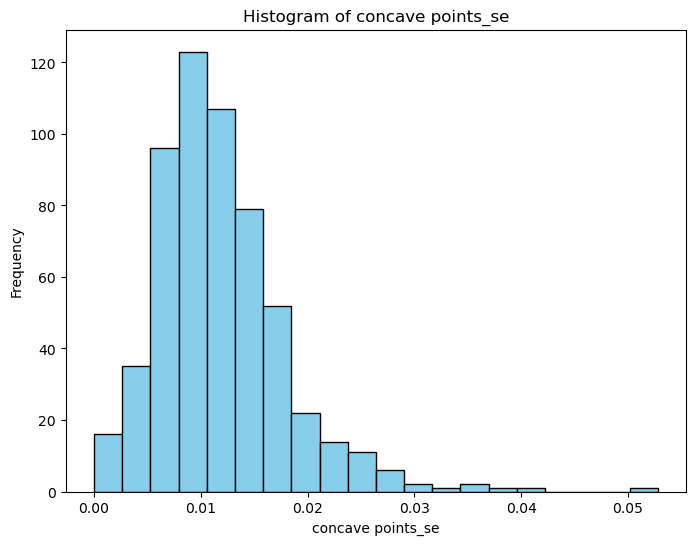

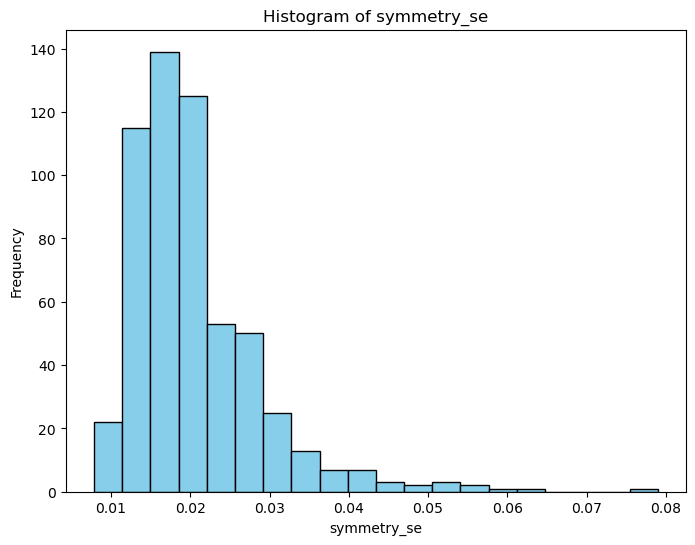

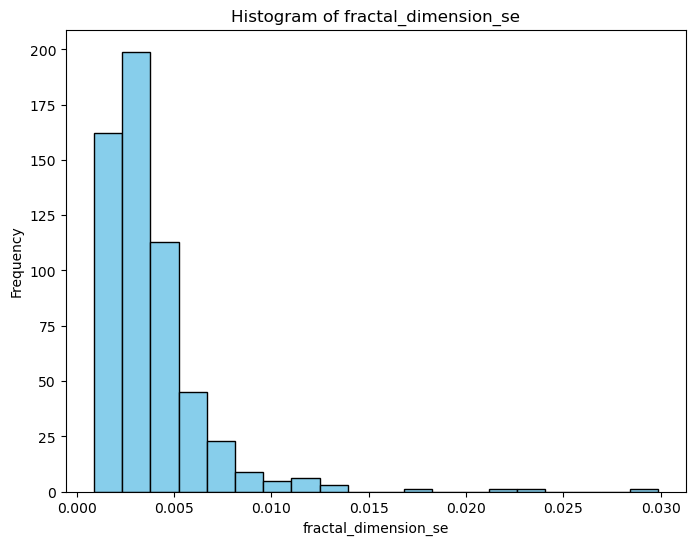

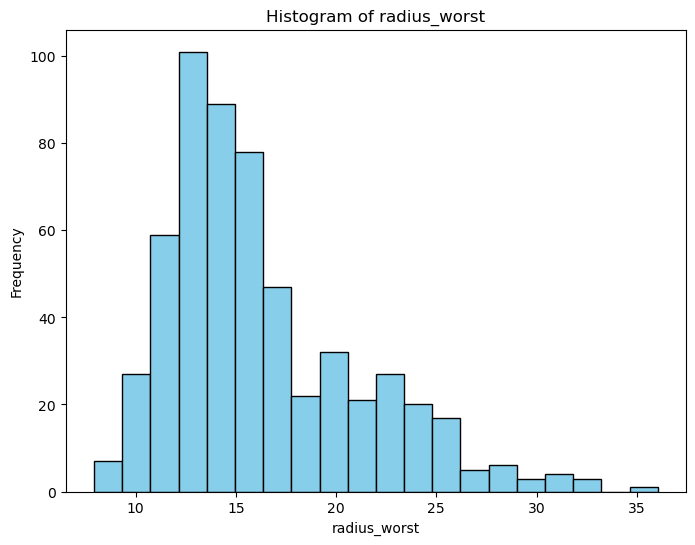

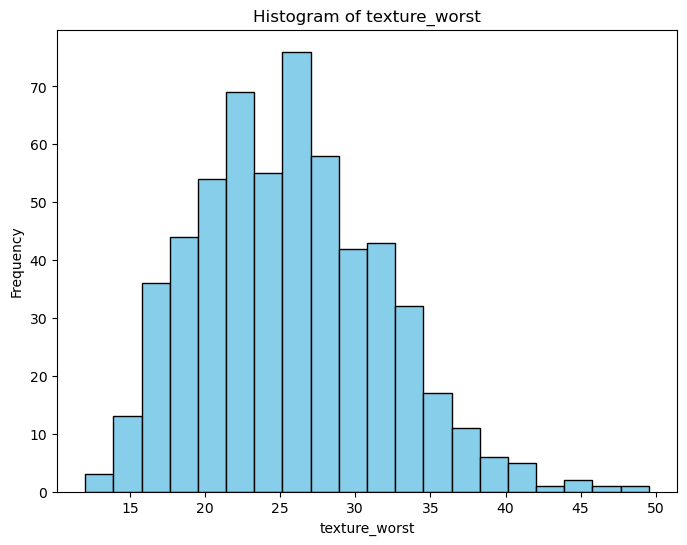

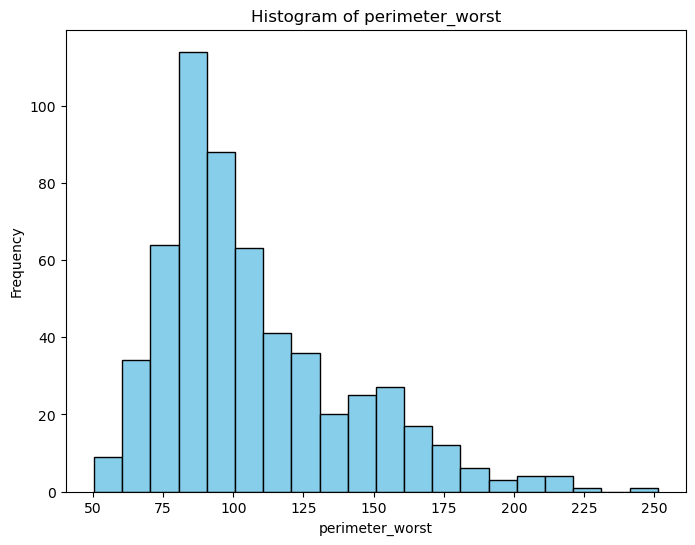

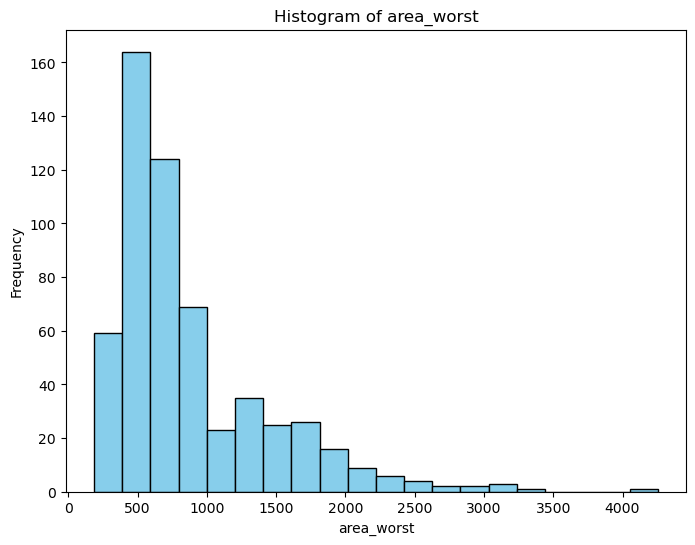

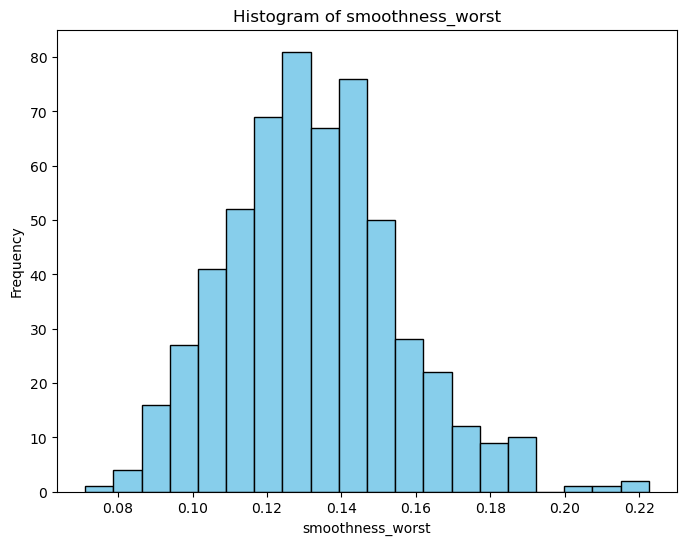

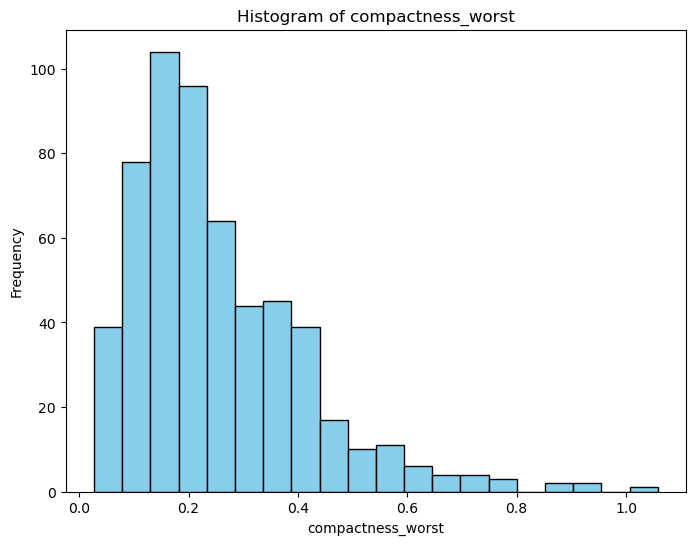

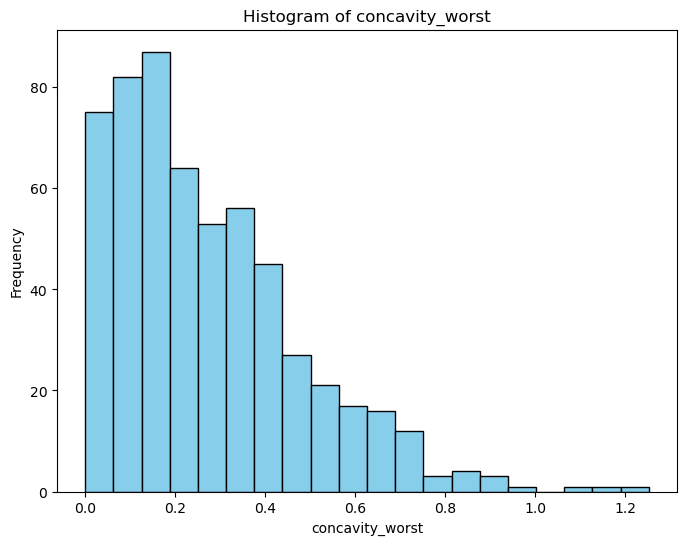

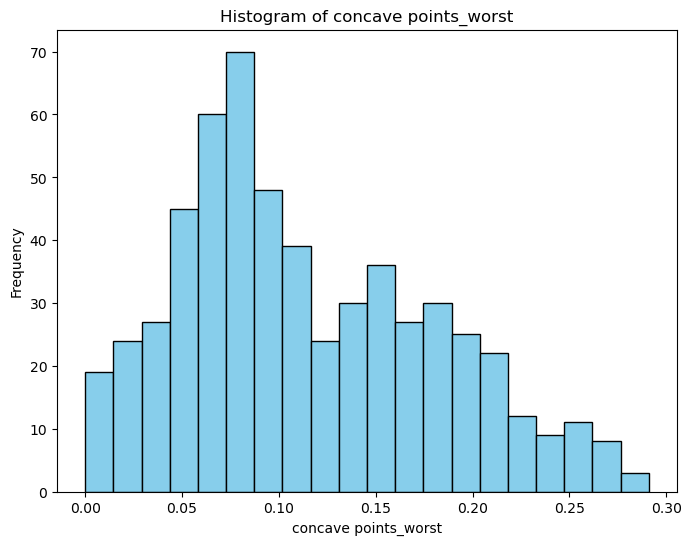

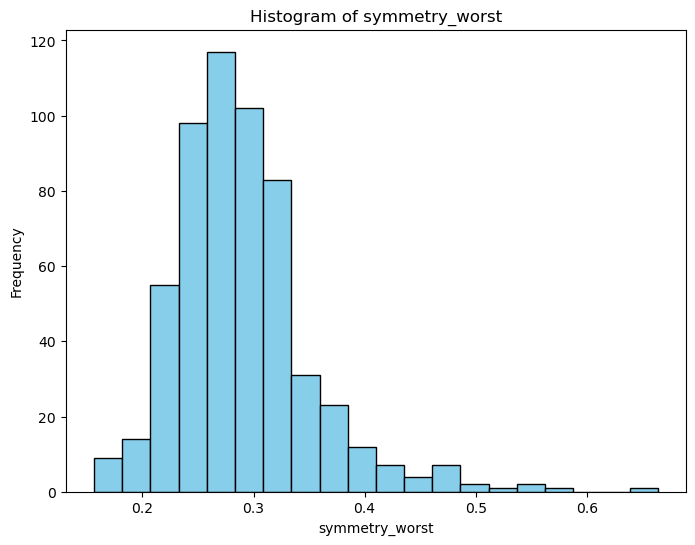

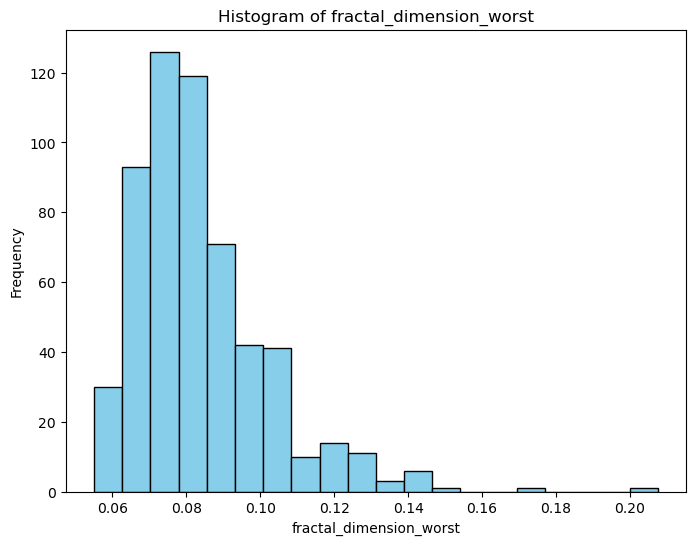

In [15]:
# Plot histograms for all numeric columns
print("Generating histograms for numeric features...")
for col in data.columns:
    if is_numeric_dtype(data[col]):
        plt.figure(figsize=(8, 6))
        data[col].hist(bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(False)
        plt.show()

c:\Users\kiara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kiara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kiara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


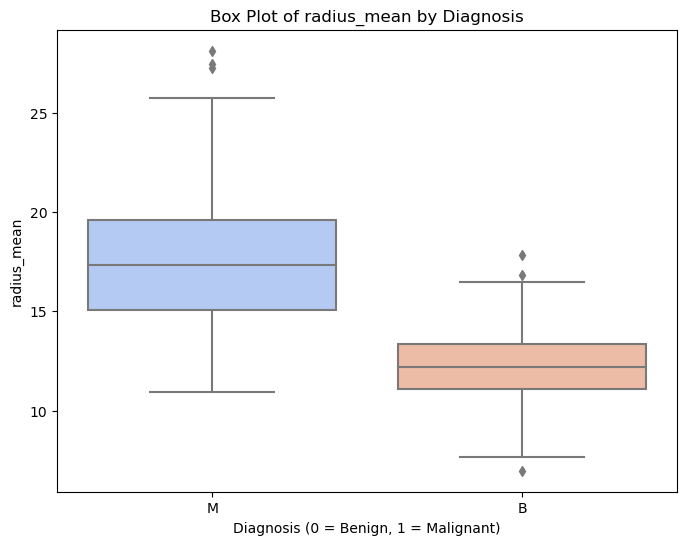

c:\Users\kiara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kiara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kiara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


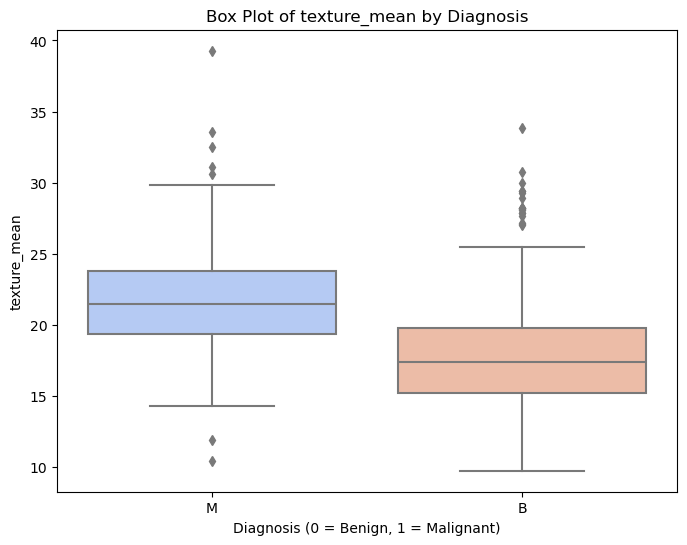

c:\Users\kiara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kiara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kiara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


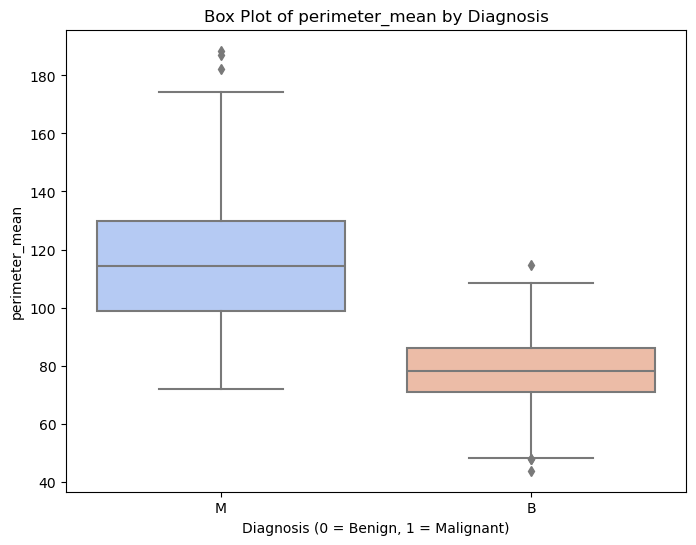

c:\Users\kiara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kiara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kiara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


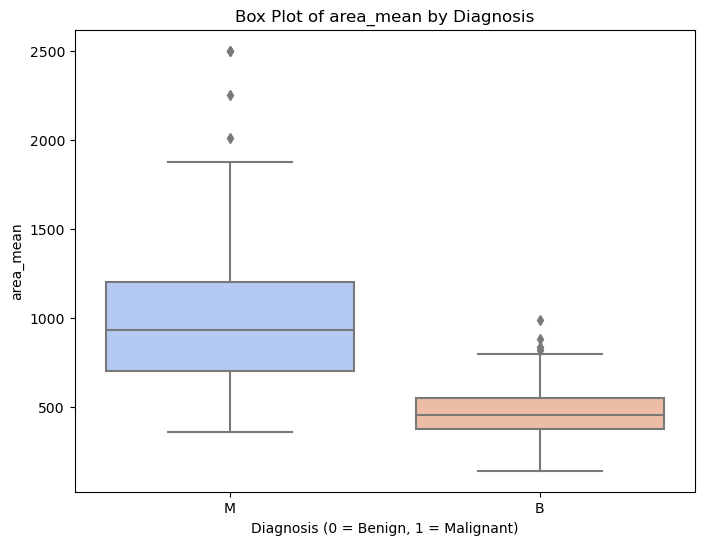

c:\Users\kiara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kiara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kiara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


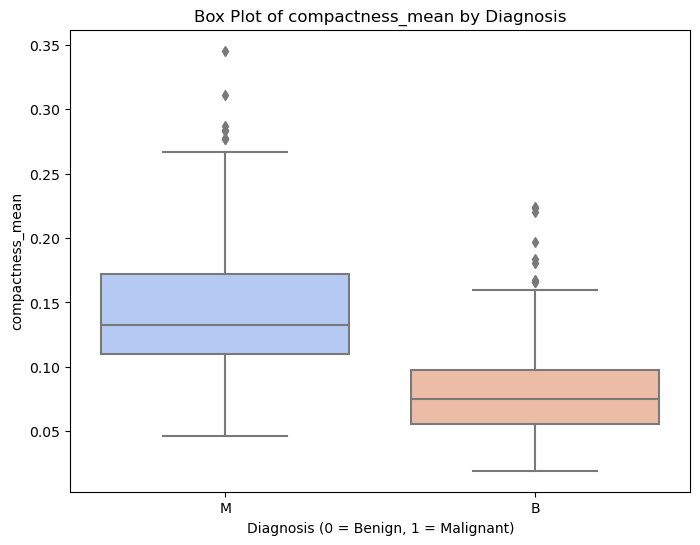

c:\Users\kiara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kiara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kiara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


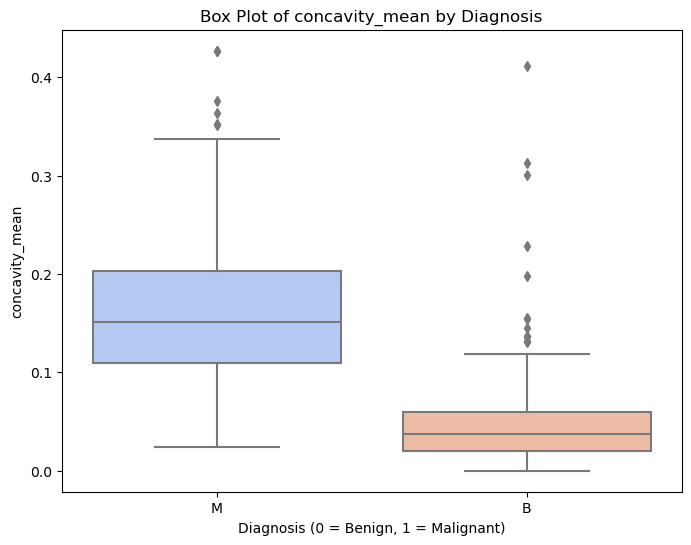

In [17]:
# List of important features to visualize 
important_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
    'compactness_mean', 'concavity_mean'
]

# Create box plots for each selected feature
for feature in important_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='diagnosis', y=feature, data=data, palette='coolwarm')
    plt.title(f'Box Plot of {feature} by Diagnosis')
    plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
    plt.ylabel(feature)
    plt.show()

c:\Users\kiara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kiara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kiara\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


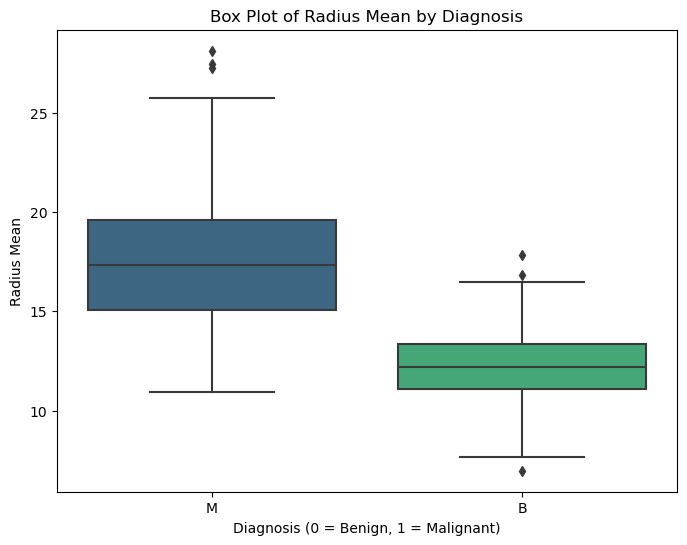

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=data, palette='viridis')
plt.title('Box Plot of Radius Mean by Diagnosis')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Radius Mean')
plt.show()


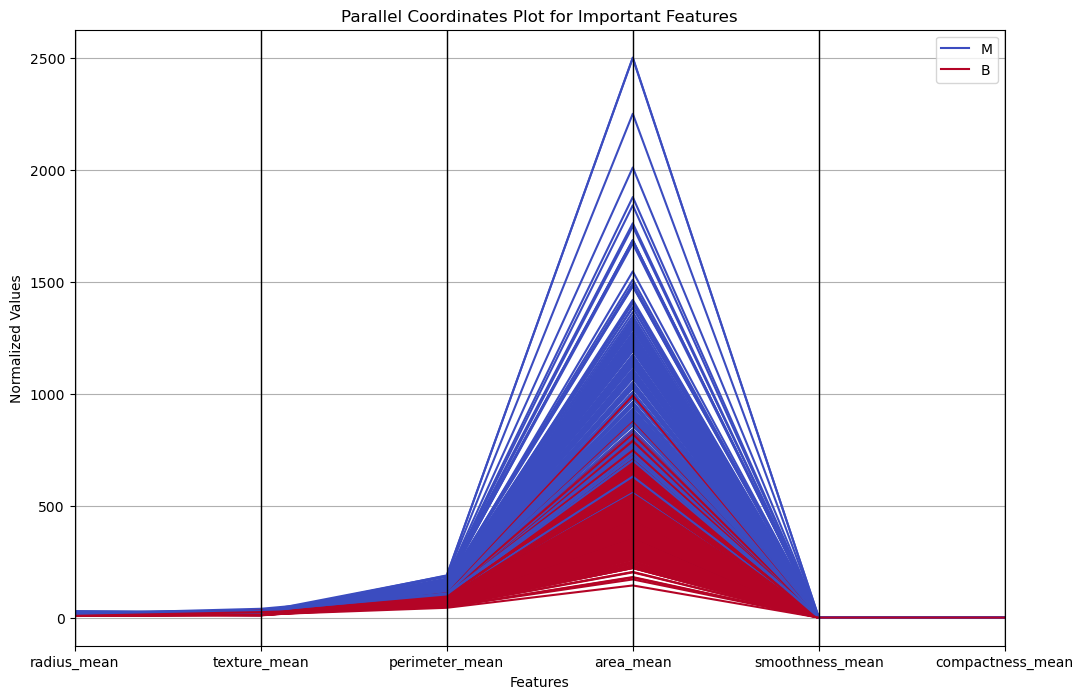

In [ ]:
# Ensure the target column ('diagnosis') is categorical
data['diagnosis'] = data['diagnosis'].astype(str)  # Convert to string for clear labeling

# subset of features for visualization
important_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
    'smoothness_mean', 'compactness_mean'
]

# new DataFrame for parallel coordinates
subset_data = data[important_features + ['diagnosis']]

# Plot parallel coordinates
plt.figure(figsize=(12, 8))
parallel_coordinates(subset_data, class_column='diagnosis', colormap='coolwarm')
plt.title('Parallel Coordinates Plot for Important Features')
plt.xlabel('Features')
plt.ylabel('Normalized Values')
plt.grid(True)
plt.show()
